In [1]:
%load_ext watermark


In [2]:
from IPython.display import display
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-04-13T00:28:00.026673+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1025-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn: 0.13.2
teeplot: 1.1.3
pandas : 2.2.3

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2024-11-05-openai-repr-size-4omini"
teeplot_subdir


'2024-11-05-openai-repr-size-4omini'

## Prep Data


In [5]:
df = pd.read_csv("https://osf.io/wt45q/download")
display(df.describe()), display(df.head()), display(df.tail());


,true answer,llm answer,score,score - invalid as nan,replicate,num_taxa
count,1330.000000,1278.000000,1330.000000,1278.000000,1330.000000,1330.000000
mean,0.586466,0.600939,0.723308,0.752739,9.000000,10.714286
std,0.706072,0.600495,0.447531,0.431589,5.479286,7.594473
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.000000,0.000000,1.000000,4.000000,4.000000
50%,0.000000,1.000000,1.000000,1.000000,9.000000,8.000000
75%,1.000000,1.000000,1.000000,1.000000,14.000000,18.000000
max,2.000000,2.000000,1.000000,1.000000,18.000000,25.000000


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,replicate,question,num_taxa,tree representation,model
0,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-05T22:43:37.179124,0,question_equivalence_identical,3,newick,gpt-4o-mini
1,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-05T22:43:37.584350,0,question_equivalence_identical,3,json,gpt-4o-mini
2,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-05T22:43:38.198350,0,question_equivalence_rotate_tree,3,newick,gpt-4o-mini
3,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",1,0,1.0,0.0,0.0,2024-11-05T22:43:38.608031,0,question_equivalence_rotate_tree,3,json,gpt-4o-mini
4,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",1,1,1.0,1.0,1.0,2024-11-05T22:43:38.915162,0,question_equivalence_swap_taxa,3,newick,gpt-4o-mini


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,replicate,question,num_taxa,tree representation,model
1325,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",1,1,1.0,1.0,1.0,2024-11-05T22:56:16.372329,18,question_equivalence_swap_taxa,25,json,gpt-4o-mini
1326,Consider the following phylogenetic tree:\n\n ...,T07 and T17|T07 and T18|T17 and T18,1,1,1.0,1.0,1.0,2024-11-05T22:56:16.780746,18,question_identify_most_related,25,newick,gpt-4o-mini
1327,Consider the following phylogenetic tree:\n\n ...,T07 and T17|T07 and T18|T17 and T18,1: T07 and T18,1,1.0,1.0,1.0,2024-11-05T22:56:17.396764,18,question_identify_most_related,25,json,gpt-4o-mini
1328,Consider the following phylogenetic tree:\n\n ...,T23|T08|neither,To determine which taxa among T23 and T08 are ...,0,NaN,0.0,NaN,2024-11-05T22:56:20.878268,18,question_most_related_to_x,25,newick,gpt-4o-mini
1329,Consider the following phylogenetic tree:\n\n ...,T23|T08|neither,To determine which taxon (T23 or T08) is most ...,0,NaN,0.0,NaN,2024-11-05T22:56:23.949274,18,question_most_related_to_x,25,json,gpt-4o-mini


In [6]:
df["Q"] = df["question"].str.slice(9)


In [7]:
df["num choices"] = df["choices"].str.count(r"\|") + 1


In [8]:
df["adj score"] = df["score"] * df["num choices"]


In [9]:
display(df.describe()), display(df.head()), display(df.tail());


,true answer,llm answer,score,score - invalid as nan,replicate,num_taxa,num choices,adj score
count,1330.000000,1278.000000,1330.000000,1278.000000,1330.000000,1330.000000,1330.000000,1330.000000
mean,0.586466,0.600939,0.723308,0.752739,9.000000,10.714286,2.400000,1.677444
std,0.706072,0.600495,0.447531,0.431589,5.479286,7.594473,0.490082,1.111071
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,4.000000,4.000000,2.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,9.000000,8.000000,2.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,14.000000,18.000000,3.000000,2.000000
max,2.000000,2.000000,1.000000,1.000000,18.000000,25.000000,3.000000,3.000000


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,replicate,question,num_taxa,tree representation,model,Q,num choices,adj score
0,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-05T22:43:37.179124,0,question_equivalence_identical,3,newick,gpt-4o-mini,equivalence_identical,2,2.0
1,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-05T22:43:37.584350,0,question_equivalence_identical,3,json,gpt-4o-mini,equivalence_identical,2,2.0
2,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-05T22:43:38.198350,0,question_equivalence_rotate_tree,3,newick,gpt-4o-mini,equivalence_rotate_tree,2,2.0
3,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",1,0,1.0,0.0,0.0,2024-11-05T22:43:38.608031,0,question_equivalence_rotate_tree,3,json,gpt-4o-mini,equivalence_rotate_tree,2,0.0
4,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",1,1,1.0,1.0,1.0,2024-11-05T22:43:38.915162,0,question_equivalence_swap_taxa,3,newick,gpt-4o-mini,equivalence_swap_taxa,2,2.0


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,replicate,question,num_taxa,tree representation,model,Q,num choices,adj score
1325,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",1,1,1.0,1.0,1.0,2024-11-05T22:56:16.372329,18,question_equivalence_swap_taxa,25,json,gpt-4o-mini,equivalence_swap_taxa,2,2.0
1326,Consider the following phylogenetic tree:\n\n ...,T07 and T17|T07 and T18|T17 and T18,1,1,1.0,1.0,1.0,2024-11-05T22:56:16.780746,18,question_identify_most_related,25,newick,gpt-4o-mini,identify_most_related,3,3.0
1327,Consider the following phylogenetic tree:\n\n ...,T07 and T17|T07 and T18|T17 and T18,1: T07 and T18,1,1.0,1.0,1.0,2024-11-05T22:56:17.396764,18,question_identify_most_related,25,json,gpt-4o-mini,identify_most_related,3,3.0
1328,Consider the following phylogenetic tree:\n\n ...,T23|T08|neither,To determine which taxa among T23 and T08 are ...,0,NaN,0.0,NaN,2024-11-05T22:56:20.878268,18,question_most_related_to_x,25,newick,gpt-4o-mini,most_related_to_x,3,0.0
1329,Consider the following phylogenetic tree:\n\n ...,T23|T08|neither,To determine which taxon (T23 or T08) is most ...,0,NaN,0.0,NaN,2024-11-05T22:56:23.949274,18,question_most_related_to_x,25,json,gpt-4o-mini,most_related_to_x,3,0.0


## Example Plot


teeplots/2024-11-05-openai-repr-size-4omini/col=q+hue=tree-representation+kind=line+palette=muted+viz=relplot+x=num-taxa+y=score+ext=.pdf
teeplots/2024-11-05-openai-repr-size-4omini/col=q+hue=tree-representation+kind=line+palette=muted+viz=relplot+x=num-taxa+y=score+ext=.png


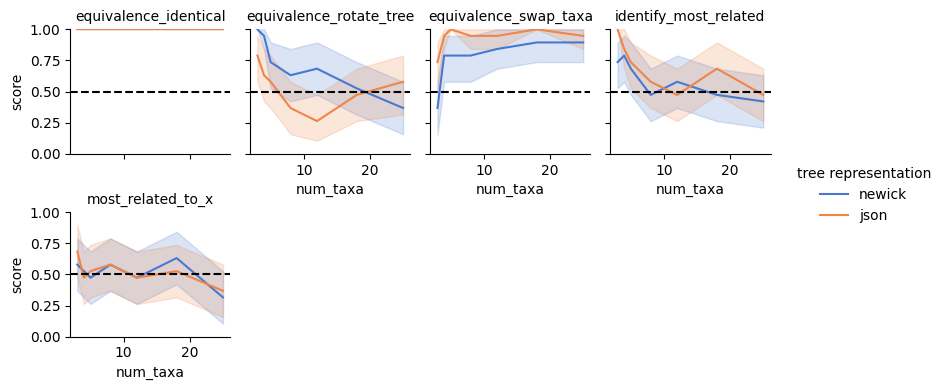

In [10]:
saveit, teed = tp.tee(
    sns.relplot,
    data=df,
    x="num_taxa",
    y="score",
    hue="tree representation",
    col="Q",
    col_wrap=4,
    height=2,
    kind="line",
    palette="muted",
    teeplot_callback=True,
    teeplot_subdir=teeplot_subdir,
)

teed.set(ylim=(0, 1.0))
teed.refline(y=0.5, linestyle="--", color="black")
teed.set_titles(col_template="{col_name}")

saveit()


teeplots/2024-11-05-openai-repr-size-4omini/col=q+hue=tree-representation+kind=line+palette=muted+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-05-openai-repr-size-4omini/col=q+hue=tree-representation+kind=line+palette=muted+viz=relplot+x=num-taxa+y=adj-score+ext=.png


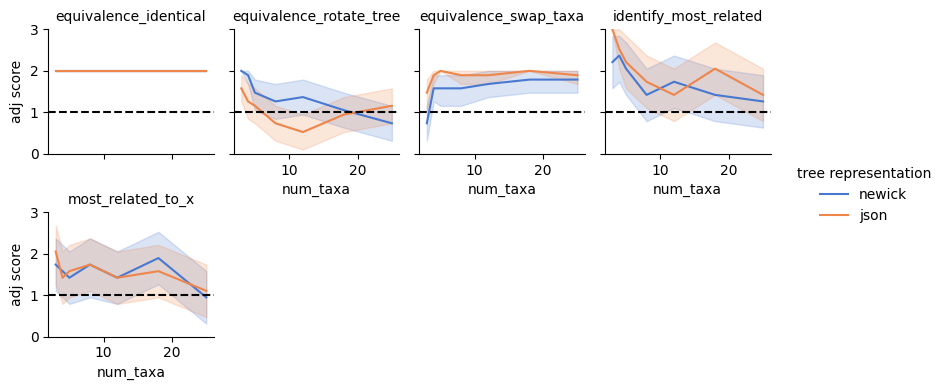

In [11]:
saveit, teed = tp.tee(
    sns.relplot,
    data=df,
    x="num_taxa",
    y="adj score",
    hue="tree representation",
    col="Q",
    col_wrap=4,
    height=2,
    kind="line",
    palette="muted",
    teeplot_callback=True,
    teeplot_subdir=teeplot_subdir,
)

teed.set(ylim=(0, df["num choices"].max()))
teed.refline(y=1.0, linestyle="--", color="black")
teed.set_titles(col_template="{col_name}")

saveit()
